# PSU STAT 501
https://newonlinecourses.science.psu.edu/stat501/node/358/


__SEE: Employee Example for Durbin Watson FOR COMPLETE EXAMPLE__

## Autocorrelation

![](http://slideplayer.com/slide/9416552/28/images/44/Autocorrelation+Autocorrelation+is+correlation+of+the+errors+(residuals)+over+time.+Here,+residuals+suggest+a+cyclic+pattern,+not+random..jpg)


In [21]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.formula.api as smf

### Autocorrelation with Google Stock

In [2]:
stock = pd.read_csv("data/google_stock.txt", sep='\t')
stock.head()

,date,price
0,2/7/2005,196.03
1,2/8/2005,198.64
2,2/9/2005,191.58
3,2/10/2005,187.98
4,2/11/2005,187.40


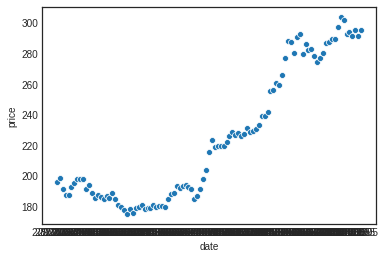

In [3]:
sns.scatterplot(x=stock.date, y=stock.price)

The consecutive values appear to follow one another fairly closely, suggesting an autogregression model could be appropriate. 

__Partial autocorrelation__
Next we will plit the __Partial Autocorrelation__ will will provide us insitght into the order the model might be in. 

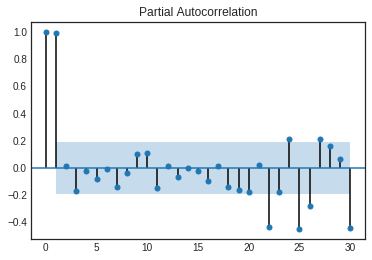

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stock.price, lags=30);

we see thtere is a __significant spike__ at `lag of 1` and much lower spikes for the subsequent lags. Thus an `AR(1)` model would likely be feasible for this data set. The _blue shadded region_  in the __Partial Autocorrelation__ tells us the area that is statistically, these __autoo-correlations are 0__. Is provide the approximate bounds that can be consutrcuted in determining __large values__ where the significance bounds are given by $\pm z_{1-\alpha/2}/\sqrt{n}$ And therefore, _values lyting outside of these bounds are _indicative of an autoregressive process.__

In other words, even thought we do hav eosme autocorrelation, there is reason to believe its not really correlated, or more specifically, its close enough to 0 that we cannot consider it in the model. 

__Lag-1 Price__

Next we will created a new column `price_lag1` variable to consider a scatterplot of price vers this lag1 variable. 

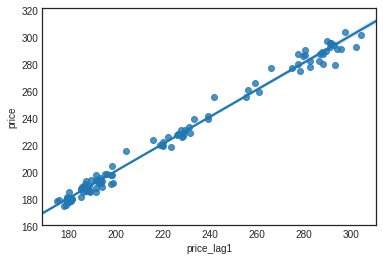

In [5]:
stock['price_lag1'] = stock.price.shift(1)
sns.regplot(x = stock.price_lag1, y=stock.price)

The regression plot above for `AR(1)` provide a linear pattern that follow this model:

    $\begin{equation*}     y_{t}=\beta_{0}+\beta_{1}y_{t-1}+\epsilon_{t}    \end{equation*}$

## Eearthquakes

In [6]:
quake = pd.read_csv("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/earthquakes/index.txt", sep='\t')
quake.head()

,Year,Quakes
0,1916,2
1,1917,5
2,1918,12
3,1919,8
4,1920,7


plot below give a time series plot fhr the number of worldwide earthquakes with magnitude greater htat 7 on ricter scale

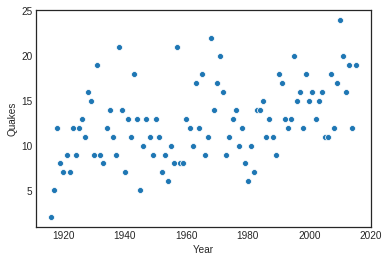

In [7]:
sns.scatterplot(x=quake.Year, y=quake.Quakes)

__partial autocorrelation function for earthquakes__

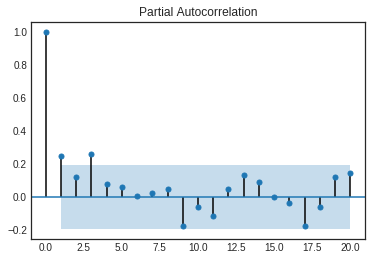

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(quake.Quakes, lags=20);

__Interpretation:__ the PACF (partical autocorrelation funciton) can be interpreted to mean that a third-order autoregression may be warnted sine there are notable partial autocorrelations for lages 1 and 3.

__MLR__
Therefore, enxt we will do a Multiple Linear Regression with the number of quakes as the response variable witht eh follwing lags in the modeol:

        $Quakes = \beta_lag1Quake + \beta_lag2Quake + \beta_lag3Quake$
   
Below is the OLS results:

In [9]:
quake['lag1_quake'] = quake.Quakes.shift(1)
quake['lag2_quake'] = quake.Quakes.shift(2)
quake['lag3_quake'] = quake.Quakes.shift(3)

In [10]:
quake_model = smf.ols(formula='Quakes~ lag1_quake + lag2_quake +lag3_quake', data = quake).fit()

print(quake_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Quakes   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.997
Date:                Sat, 01 Jun 2019   Prob (F-statistic):            0.00294
Time:                        06:23:07   Log-Likelihood:                -266.37
No. Observations:                  97   AIC:                             540.7
Df Residuals:                      93   BIC:                             551.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4492      1.786      3.610      0.0

The results show that `lag3_quake`predictor is __significant__ at 0.05 level (and lag-1 predictor p-value is also relatively small). 

# Durbin Watson Test

Test statistic for Durbin Watson Test

$D=\frac{\sum_{t=2}^{n}(e_{t}-e_{t-1})^{2}}{\sum_{t=1}^{n}e_{t}^{2}}$

Where: $e_t = y_t - \hat{y_t}$ are __residuals__ from the OLS regression. 

Hythoesis for the Durbin Watson test are 

Hypthesis | Interpretation 
--- | ---
$H_{0}: \rho=0$ | $\rho=0$ means that $\epsilon_{t}=\omega_{t}$, or that the error term in one period is not correlated with the error term in the previous period
$H_{A}: \rho\neq 0$ | $\rho\neq 0.$ mean the error term in one period is either positively or negatively correlated with the error term in the previous period.


DW test statistic varies from 0 to 4. __Rule of thumb__ stat around 2 indicates __no Serial Correlation__

### Example with ComSales data

In [18]:
comsales = pd.read_csv("./data/blaisdell.txt", sep='\t')
comsales.head()

,time,comsales,indsales
0,1,20.96,127.3
1,2,21.40,130.0
2,3,21.96,132.7
3,4,21.52,129.4
4,5,22.39,135.0


In [19]:
comsales_model = smf.ols(formula='comsales~ indsales', data = comsales).fit()

print(comsales_model.summary())

                            OLS Regression Results                            
Dep. Variable:               comsales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.489e+04
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.01e-27
Time:                        06:26:45   Log-Likelihood:                 21.730
No. Observations:                  20   AIC:                            -39.46
Df Residuals:                      18   BIC:                            -37.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4548      0.214     -6.793      0.0

Durbin-Watson test statistics is 0.7347256335186707


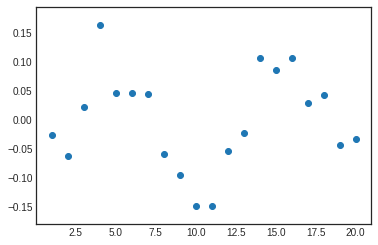

In [23]:
print( "Durbin-Watson test statistics is " + str(stools.durbin_watson(comsales_model.resid)))

plt.scatter(comsales.time, comsales_model.resid)
plt.show()

Sience the values of the DW stat falls below the lower bound at 0.01 significant level _(from table DW test bounds)_, __`DW: 0.73 <` $d_L$ `= .95` we reject $H_0$ and conclude that the errors are positively autocorrelated, in other words, there is strong evidence the error terms are positively correlated__. 


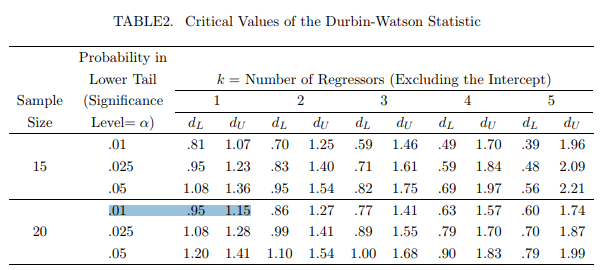

----
# Employee Example for Durbin Watson

ata set gives the number of employees (in thousands) for a metal fabricator and one of their primary vendors for each month over a 5-year period, so n = 60 

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/ch15/metal_fabrication_image/index.jpg)

In [36]:
employee = pd.read_csv("./data/employee.txt", sep="\t")
employee.head()

,time,vendor,metal
0,1,322,44.2
1,2,317,44.3
2,3,319,44.4
3,4,323,43.4
4,5,327,42.8


Regression model:

$y_{t}=\beta_{0}+\beta_{1}x_{t}+\epsilon_{t}$


__OLS and OLS plot__

In [81]:
employee_model = smf.ols(formula='metal~ vendor', data = employee).fit()
print(employee_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  metal   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     168.8
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           8.01e-19
Time:                        07:30:25   Log-Likelihood:                -111.94
No. Observations:                  60   AIC:                             227.9
Df Residuals:                      58   BIC:                             232.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8479      3.300      0.863      0.3

The stimated equation is $y_{t}=2.85+0.12244x_{t}+e_{t}$

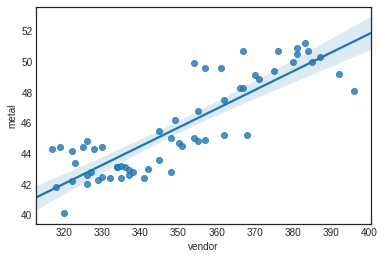

In [58]:
sns.regplot(x = employee.vendor, y=employee.metal);

Notice the __non-random__ trend suggesting __autocorrelated errors in the scatter plot__

__Scatter plot of the residuals vs `t` (the time ordering)__

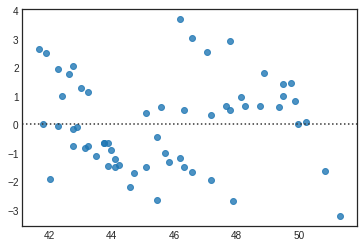

In [56]:
sns.residplot(x = employee_model.fittedvalues, y = employee_model.resid);

__PACF plot of the residuals__

this helps us decide the lag values

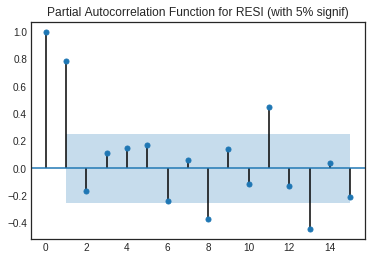

In [72]:
plot_pacf(employee_model.resid, lags=15,
         title='Partial Autocorrelation Function for RESI (with 5% signif)',
         alpha=0.05);

The __Partial Autocorrlation Function__ graph above looks like there is a __lag of 1__ since the __`lag-1` partial autocorrlation is so large and way beyond the "5% significance limits"__ indicated by the blue box. We can see that there are partial autocorrelations at:
* lag 8
* lag 11
* lag 13

Which are __slighly beyond the limits__ 

Additionally, the DW statistics is:

In [79]:
print( "Durbin-Watson test statistics is " + str(stools.durbin_watson(employee_model.resid)))

Durbin-Watson test statistics is 0.35923959882840384


To find the p-value for this test, we have to look up the Durbin-Watson critical value from this table:
https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/

sample size | number of terms (including intercept) | $D_L$ | $D_U$ 
--- | --- | --- | ---
60 | 2 | 1.54853 | 1.61617

Since DW: 0.35 < 1.54, which indicates __a highly significant p-value__ approximately 0, we can __reject $H_0$__ that there is __significant evidence that there is a positive correlation__ a lag of 1 appears appropriate. 

### Employee Example - AR(1) Method - Cochrane-Orcutt procedure
per: https://newonlinecourses.science.psu.edu/stat501/node/365/

We start by fitting a simple linar regression model with 
* the _response variable_ equal to the residuals from the `employee_model` _(above)_; and,
* the _predictor variable_ equal to the `lag-1 residual`

with no intercept, we obtain the __slope estimate__, $\hat{\rho}$`= 0.8313` (also seen as `r`)

because we let $\hat{\rho}$ = estimated lag 1 autocorrlation in the residuals from the OLS

In [87]:
employee['model1_resid'] = employee_model.resid
employee['model1_resid_lag'] = employee.model1_resid.shift(1)

In [114]:
employee_lag_model = smf.ols(formula='model1_resid~ model1_resid_lag', data = employee).fit()
employee_lag_model.params

Intercept          -0.078327
model1_resid_lag    0.833246
dtype: float64

In [116]:
r_slope_est = employee_lag_model.params[1]
print("rho or r:", r_slope_est)

rho or r: 0.8332462820760463


Now we transform to the following:
    
$y_{t}^{*}=y_{t}-ry_{t-1}$ - this will be used as a response variable

$x_{t}^{*}=x_{t}-rx_{t-1}$ - predictor variable


In [97]:

employee['vendor_lag'] = employee.vendor.shift(1)
employee['metal_lag'] = employee.metal.shift(1)

employee['y_star'] = employee.metal - (r_slope_est * employee.metal_lag)
employee['x_star'] = employee.vendor - (r_slope_est * employee.vendor_lag)

Now with the value of $\hat{\rho} = 0.833$ and the modified vaariables are $y_{new_star} = y_t - 0.833y_{t-1}$ and $x_{new_star} = x_t - 0.833x_{t-1}$ the regression results are provided below:

In [99]:
employee_lag1_model = smf.ols(formula='y_star~ x_star', data = employee).fit()
print(employee_lag1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_star   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     13.35
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           0.000565
Time:                        07:40:25   Log-Likelihood:                -64.338
No. Observations:                  59   AIC:                             132.7
Df Residuals:                      57   BIC:                             136.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8493      0.778      6.232      0.0

we can see form above we __perform simple linear regression of $y_{t}^{*}$ on $x_{t}^{*}$__ - This model should have __Time independent residuals__ we now have:

$\hat{\beta}_{1}^{*}=0.0479=\hat{\beta}_{1}$


$\hat{\beta}_{0}^{*}=4.8493\Rightarrow\hat{\beta}_{0}=\frac{4.8493}{1-0.833}=29.037$

__The correct standard error for the slope is taken directly from the regression with the modified variables.__

In [117]:
4.8493/(1-0.833)

29.0377245508982

Corresponding standard erros are 

$\mbox{s.e.}(\hat{\beta}_{1}^{*})=0.0130=\mbox{s.e.}(\hat{\beta}_{1})$

$\mbox{s.e.}(\hat{\beta}_{0}^{*})=0.787\Rightarrow\mbox{s.e.}(\hat{\beta}_{0})=\frac{0.787}{1-0.833}=4.667$
